This notebook is verifying that the two hyperparameter $(\mu, \sigma^2)$ version of the Berry problem is producing the same results as the one parameter condensed $\sigma^2$ version.

At the end of the notebook, we plot $p(\sigma^2 | y)$ as determined by INLA via both of these versions of the problem.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


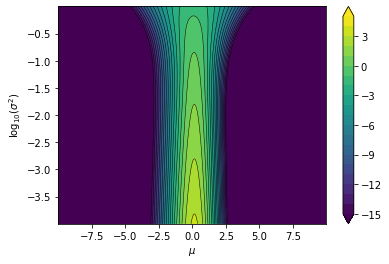

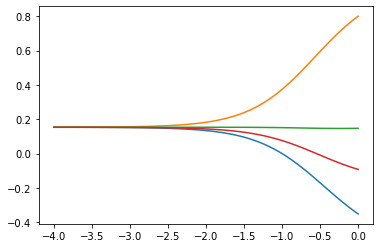

In [7]:
%load_ext autoreload
%autoreload 2
import numpy as np
import berry
import inla
import matplotlib.pyplot as plt

y_i = np.array([[3, 8, 5, 4]])
n_i = np.full((1, 4), 15)
data = np.stack((y_i, n_i), axis=2)

n = 90
a, b = (1e-4, 1e-0)
b_mu = berry.BerryMu(sigma2_n=n, sigma2_bounds=(a, b))
post_hyper_mu, report_mu = inla.calc_posterior_hyper(b_mu, data)

b_no_mu = berry.Berry(sigma2_n=n, sigma2_bounds=(a, b))
post_hyper_no_mu, report_no_mu = inla.calc_posterior_hyper(b_no_mu, data)

berry.plot_2d_field(
    report_mu, np.log10(post_hyper_mu[0]), levels=np.linspace(-15, 5, 21)
)
plt.show()

plt.plot(np.log10(b_no_mu.sigma2_rule.pts), report_no_mu["x0"][0, :, :])
plt.show()

In [8]:
num_int_mu = np.sum(post_hyper_mu[0] * b_mu.mu_rule.wts[:, None], axis=0)
num_int_mu /= np.sum(num_int_mu * b_mu.sigma2_rule.wts, axis=0)

In [9]:
num_int_mu

array([1.03193569e+03, 1.02515248e+03, 1.01306345e+03, 9.95859054e+02,
       9.73811458e+02, 9.47265422e+02, 9.16629374e+02, 8.82365107e+02,
       8.44976297e+02, 8.04996206e+02, 7.62974953e+02, 7.19466792e+02,
       6.75017811e+02, 6.30154455e+02, 5.85373247e+02, 5.41131984e+02,
       4.97842654e+02, 4.55866195e+02, 4.15509161e+02, 3.77022233e+02,
       3.40600489e+02, 3.06385206e+02, 2.74467008e+02, 2.44890042e+02,
       2.17656948e+02, 1.92734313e+02, 1.70058360e+02, 1.49540646e+02,
       1.31073560e+02, 1.14535475e+02, 9.97954325e+01, 8.67172903e+01,
       7.51632836e+01, 6.49970013e+01, 5.60857841e+01, 4.83025845e+01,
       4.15273342e+01, 3.56478774e+01, 3.05605299e+01, 2.61703248e+01,
       2.23910054e+01, 1.91448188e+01, 1.63621594e+01, 1.39811069e+01,
       1.19468931e+01, 1.02113300e+01, 8.73222227e+00, 7.47278414e+00,
       6.40107389e+00, 5.48945738e+00, 4.71410685e+00, 4.05453941e+00,
       3.49319715e+00, 3.01506916e+00, 2.60735434e+00, 2.25916325e+00,
      

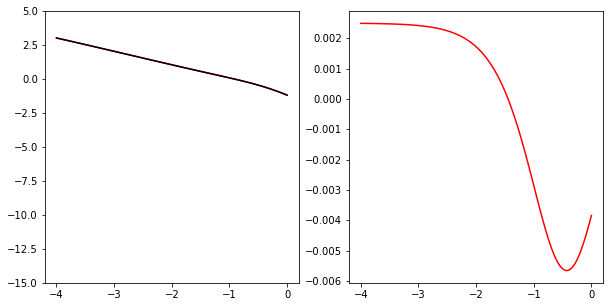

In [10]:
log_sig = np.log10(b_no_mu.sigma2_rule.pts)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(log_sig, np.log10(post_hyper_no_mu[0]), "r-")
plt.plot(log_sig, np.log10(num_int_mu), "k-")
plt.ylim([-15, 5])
plt.subplot(1, 2, 2)
plt.plot(log_sig, (post_hyper_no_mu[0] - num_int_mu) / post_hyper_no_mu[0], "r-")
plt.show()

In [6]:
thresh = np.full((1, 4), -0.0)
mu_stats = inla.calc_posterior_x(post_hyper_mu, report_mu, thresh)
no_mu_stats = inla.calc_posterior_x(post_hyper_no_mu, report_no_mu, thresh)
print(mu_stats["exceedance"])
print(no_mu_stats["exceedance"])

(1, 90, 4, 4)
[[0.59372767 0.77160231 0.67124086 0.63316734]]
[[0.60843487 0.78526767 0.68592444 0.64792192]]
